# Project Overview

**Project Introduction**

Lightweight fine-tuning is one of the most important techniques for adapting foundation models, because it allows you to modify foundation models for your needs without needing substantial computational resources.

In this project, you will apply parameter-efficient fine-tuning using the Hugging Face `peft` library.

**Project Summary**

In this project, you will bring together all of the essential components of a PyTorch + Hugging Face training and inference process. Specifically, you will:

1. Load a pre-trained model and evaluate its performance
2. Perform parameter-efficient fine tuning using the pre-trained model
3. Perform inference using the fine-tuned model and compare its performance to the original model

## HuggingFace PEFT Library

**Key Concepts**

Hugging Face PEFT allows you to fine-tune a model without having to fine-tune all of its parameters.

Training a model using Hugging Face PEFT requires two additional steps beyond traditional fine-tuning:

1. Creating a **PEFT config**
2. **Converting the model into a PEFT model** using the PEFT config
Inference using a PEFT model is almost identical to inference using a non-PEFT model. The only difference is that it must be loaded as a PEFT model.

## Training with PEFT

Creating a PEFT Config
The PEFT config specifies the adapter configuration for your parameter-efficient fine-tuning process. The base class for this is a `PeftConfig`, but this example will use a `LoraConfig`, the subclass used for low rank adaptation (LoRA).

A LoRA config can be instantiated like this:

```python
from peft import LoraConfig
config = LoraConfig()
```

Look at the LoRA adapter documentation for additional hyperparameters that can be specified by passing arguments to `LoraConfig()`. [Hugging Face LoRA conceptual guide](https://huggingface.co/docs/peft/main/en/conceptual_guides/lora) also contains additional explanations.

## Converting a Transformers Model into a PEFT Model

Once you have a PEFT config object, you can load a Hugging Face `transformers` model as a PEFT model by first loading the pre-trained model as usual (here we load GPT-2):

```python
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("gpt2")
```

Then using `get_peft_model()` to get a trainable PEFT model (using the LoRA config instantiated previously):

```python
from peft import get_peft_model
lora_model = get_peft_model(model, config)
```

## Training with a PEFT Model

After calling `get_peft_model()`, you can then use the resulting `lora_model` in a training process of your choice (PyTorch training loop or Hugging Face `Trainer`).

## Checking Trainable Parameters of a PEFT Model

A helpful way to check the number of trainable parameters with the current config is the `print_trainable_parameters()` method:

```python
lora_model.print_trainable_parameters()
```

Which prints an output like this:

`trainable params: 294,912 || all params: 124,734,720 || trainable%: 0.23643136409814364`

## Saving a Trained PEFT Model

Once a PEFT model has been trained, the standard Hugging Face `save_pretrained()` method can be used to save the weights locally. For example:

```python
lora_model.save_pretrained("gpt-lora")
```

Note that this **only saves the adapter weights** and not the weights of the original Transformers model. Thus the size of the files created will be much smaller than you might expect.

# Inference with PEFT

## Loading a Saved PEFT Model

Because you have only saved the adapter weights and not the full model weights, you can't use `from_pretrained()` with the regular Transformers class (e.g., `AutoModelForCausalLM`). Instead, you need to use the PEFT version (e.g., `AutoPeftModelForCausalLM`). For example:

```python
from peft import AutoPeftModelForCausalLM
lora_model = AutoPeftModelForCausalLM.from_pretrained("gpt-lora")
```

After completing this step, you can proceed to use the model for inference.

# Generating Text from a PEFT Model

You may see examples from regular Transformer models where the input IDs are passed in as a positional argument (e.g., `model.generate(input_ids)`). For a PEFT model, they must be passed in as a keyword argument (e.g., `model.generate(input_ids=input_ids)`). For example:

```python
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")
inputs = tokenizer("Hello, my name is ", return_tensors="pt")
outputs = model.generate(input_ids=inputs["input_ids"], max_new_tokens=10)
print(tokenizer.batch_decode(outputs))
```

**Documentation Links**

* [Hugging Face PEFT configuration](https://huggingface.co/docs/peft/package_reference/config)
* [Hugging Face LoRA adapter](https://huggingface.co/docs/peft/package_reference/lora)
* [Hugging Face Models save_pretrained](https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.PreTrainedModel.save_pretrained)
* [Hugging Face Text Generation](https://huggingface.co/docs/transformers/main_classes/text_generation)

# Project Instructions

To pass this project, your code must:

1. Load a pre-trained model and evaluate its performance
2. Perform parameter-efficient fine-tuning using the pre-trained model
3. Perform inference using the fine-tuned model and compare its performance to the original model

## Getting Started

This project is failry open-ended. As long as you follow the prescribed steps **you may choose any appropriate PEFT technique, model, evaluation approach, and fine-tuning dataset.**

* **PEFT Technique**:

> * The PEFT technique covered in this course was LoRA, but new techniques are continuously being developed. See the [PEFT README](https://github.com/huggingface/peft) for links to the papers behind each of the supported techniques.
> * If you are unsure, we recommend using **LoRA** as your PEFT technique. LoRA is the only PEFT technique that is compatible with all models at this time.

* **Model**

> * Your choice of model will depend on your choice of PEFT technique.
> * Unless you plan to use your own hardware/GPU rather than the Udacity Workspace, it's best to choose a smaller model.
> * The model must be compatible with a sequence classification task.
> * If you are unsure, we recommend using GPT-2 as your model. This is a relatively small model that is compatible with sequence classification and LoRA.

For specific model names in the Hugging Face registry, you can use the widget at the bottom of the [PEFT documentation homepage](https://huggingface.co/docs/peft/index) (select "sequence classification" from the drop-down).

* **Evaluation Approach**

> * The evaluation approach covered in this course was the `evaluate` method with a Hugging Face `Trainer`. You may use the same approach, or any other reasonable evaluation approach for a sequence classification task
> * The key requirement for the evaluation is that you must be able to compare the original foundation model's performance and the fine-tuned model's performance.

* **Dataset**

> * Your PEFT process must use a dataset from Hugging Face's `datasets` library. As with the selection of model, you will need to ensure that the dataset is small enough that it is usable for your workspace
> * The key requirement for the dataset is that it matches the task. Follow this link to [view Hugging Face datasets filtered by the text classification task](https://huggingface.co/datasets?task_categories=task_categories:text-classification)

## Loading and Evaluating a Foundation Model

### Loading the model

Once you have selected a model, load it in your notebook.

### Evaluating the model

Perform an initial evaluation of the model on your chosen sequence classification task. This step will require that you also load an appropriate tokenizer and dataset.

## Performing Parameter-Efficient Fine-Tuning

### Creating a PEFT config

Create a PEFT config with appropriate hyperparameters for your chosen model.

### Creating a PEFT model

Using the PEFT config and foundation model, create a PEFT model.

### Training the model

Using the PEFT model and dataset, run a training loop with at least one epoch.

### Saving the trained model

Depending on your training loop configuration, your PEFT model may have already been saved. If not, use `save_pretrained` to save your progress

## Performing Inference with a PEFT Model

## Loading the model

Using the appropriate PEFT model class, load your trained model.

## Evaluating the model

Repeat the previous evaluation process, this time using the PEFT model. Compare the results to the results from the original foundation model.

# Actual Project

In [1]:
# from peft import LoraConfig, get_peft_model
# from transformers import (
#     AutoModelForCausalLM, DataCollatorWithPadding, Trainer, TrainingArguments, AutoTokenizer)
# from datasets import load_dataset
# import evaluate
# import torch
# import numpy as np

In [1]:
# With Claude Help
import torch
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import (
    GPT2LMHeadModel, 
    GPT2Tokenizer, 
    GPT2ForSequenceClassification,
    Trainer, 
    TrainingArguments,
    DataCollatorWithPadding
)
from peft import LoraConfig, get_peft_model, TaskType
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up compute device
# Check if MPS is available
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS device found!")
else:
    print("MPS device not found, using CPU instead.")
    device = torch.device("cpu")

# Set default device to MPS (optional)
# torch.set_default_device(device)

MPS device found!


In [3]:
# https://huggingface.co/datasets/mteb/InsurancePolicyInterpretationLegalBenchClassification
# https://huggingface.co/datasets/Yelp/yelp_review_full
# Bring in the data set
ds_ins = load_dataset("mteb/InsurancePolicyInterpretationLegalBenchClassification")
ds_yelp = load_dataset("Yelp/yelp_review_full")

In [4]:
ds_ins

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 5
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 133
    })
})

In [5]:
ds_yelp

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 650000
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 50000
    })
})

In [6]:
# Reduce size of ds_yelp
SUBSET_SIZE = 10000  # Set to None to use full dataset
if SUBSET_SIZE:
    ds_yelp["train"] = ds_yelp["train"].select(range(min(SUBSET_SIZE, len(ds_yelp["train"]))))
    ds_yelp["test"] = ds_yelp["test"].select(range(min(SUBSET_SIZE//5, len(ds_yelp["test"]))))
    print(f"Using subset - Train: {len(ds_yelp['train'])}, Test: {len(ds_yelp['test'])}")

Using subset - Train: 10000, Test: 2000


Dataset Structure:
Columns: ['label', 'text']
Data types:
label     int64
text     object
dtype: object

Label Distribution (Train):
  1 stars: 1788 reviews (17.9%)
  2 stars: 2168 reviews (21.7%)
  3 stars: 2361 reviews (23.6%)
  4 stars: 2082 reviews (20.8%)
  5 stars: 1601 reviews (16.0%)


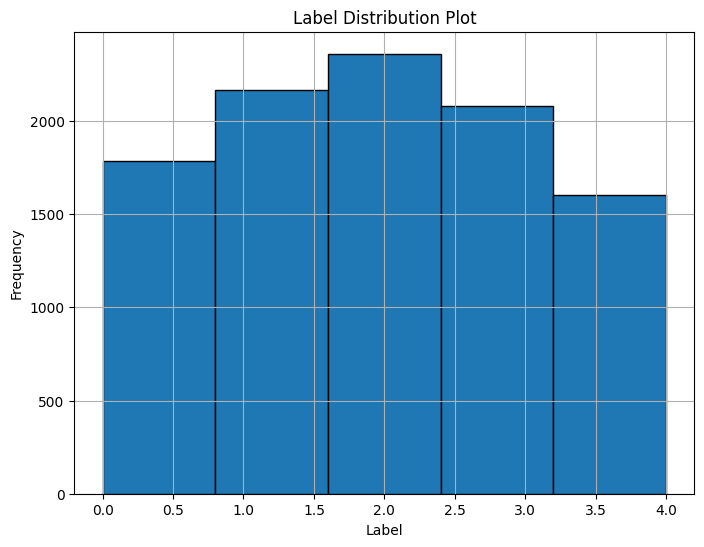


Sample Reviews:

Review 1 (5 stars):
Text: dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-no...

Review 2 (2 stars):
Text: Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply ...

Review 3 (4 stars):
Text: Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of hi...

Text Statistics:
Average words per review: 130.2
Median words per review: 99.0
Max words: 937
Min words: 1


In [13]:
# Describe the data
train_df = ds_yelp["train"].to_pandas()
test_df = ds_yelp["test"].to_pandas()

print("Dataset Structure:")
print(f"Columns: {train_df.columns.tolist()}")
print(f"Data types:\n{train_df.dtypes}")

print("\nLabel Distribution (Train):")
label_counts = train_df['label'].value_counts().sort_index()
for label, count in label_counts.items():
    print(f"  {label + 1} stars: {count} reviews ({count/len(train_df)*100:.1f}%)")

plt.figure(figsize=(8, 6))
train_df["label"].hist(bins=5, edgecolor='black')
plt.title("Label Distribution Plot")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

print("\nSample Reviews:")
for i in range(3):
    print(f"\nReview {i+1} ({train_df.iloc[i]['label'] + 1} stars):")
    print(f"Text: {train_df.iloc[i]['text'][:200]}...")

print(f"\nText Statistics:")
text_lengths = [len(text.split()) for text in train_df['text']]
print(f"Average words per review: {np.mean(text_lengths):.1f}")
print(f"Median words per review: {np.median(text_lengths):.1f}")
print(f"Max words: {np.max(text_lengths)}")
print(f"Min words: {np.min(text_lengths)}")

## Loading and Evaluating a Foundation Model

### Loading the model

Once you have selected a model, load it in your notebook.


In [15]:
model_name = "gpt2"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForCausalLM.from_pretrained("gpt2")
# Load tokenizer

tokenizer = GPT2Tokenizer.from_pretrained(model_name)

In [16]:
# Add padding token (GPT-2 doesn't have one by default)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    
print(f"Tokenizer loaded: {model_name}")
print(f"Vocab size: {tokenizer.vocab_size:,}")
print(f"Pad token: {tokenizer.pad_token}")

Tokenizer loaded: gpt2
Vocab size: 50,257
Pad token: <|endoftext|>


In [17]:
# Load model for sequence classification (5 classes for 1-5 star ratings, pad-token
num_label = len(train_df["label"].unique())
model = GPT2ForSequenceClassification.from_pretrained(
    model_name, 
    num_labels=num_label,
    pad_token_id=tokenizer.pad_token
)
# Fix the pad_token_id configuration issue
model.config.pad_token_id = tokenizer.eos_token_id

# Resize token embeddings to match tokenizer (in case pad token was added)
model.resize_token_embeddings(len(tokenizer))

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedding(50257, 768)

In [18]:
model.to(device)
print(f"Model loaded and moved to {device}")
print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Pad token ID: {model.config.pad_token_id}")
print(f"EOS token ID: {tokenizer.eos_token_id}")

Model loaded and moved to mps
Model parameters: 124,443,648
Pad token ID: 50256
EOS token ID: 50256


In [19]:
# Make the data usable for gpt2
max_length = 512  # Maximum sequence length

def preprocess_function(examples):
    """Tokenize the text and prepare labels"""
    # Tokenize the text - don't use return_tensors for batch processing
    result = tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=max_length
    )
    
    # Labels are already 0-4, which matches our model's expected format
    result["labels"] = examples["label"]
    return result

In [20]:
tokenized_datasets = ds_yelp.map(
    preprocess_function,
    batched=True,
    remove_columns=ds_yelp["train"].column_names
)

In [21]:
print(f"Tokenized train samples: {len(tokenized_datasets['train']):,}")
print(f"Tokenized test samples: {len(tokenized_datasets['test']):,}")

Tokenized train samples: 10,000
Tokenized test samples: 2,000


In [22]:
# Split test set for evaluation during training and final testing
test_size = len(tokenized_datasets["test"])
ho_size = min(500, test_size // 2)

ho_dataset = tokenized_datasets["test"].select(range(ho_size))
final_test_dataset = tokenized_datasets["test"].select(range(ho_size, test_size))

In [23]:
print(f"Evaluation dataset: {len(ho_dataset)} samples")
print(f"Final test dataset: {len(final_test_dataset)} samples")

Evaluation dataset: 500 samples
Final test dataset: 1500 samples


### Evaluating the model

Perform an initial evaluation of the model on your chosen sequence classification task. This step will require that you also load an appropriate tokenizer and dataset.

In [24]:
def evaluate_model(model, test_dataset, batch_size=16):
    """Evaluate model performance"""
    model.eval()
    all_predictions = []
    all_labels = []
    
    dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

def evaluate_model_with_trainer(model, test_dataset, model_name="model"):
    """Evaluate model performance using HuggingFace Trainer"""
    print(f"Evaluating {model_name} using HuggingFace Trainer...")
    
    # Define compute metrics function
    def compute_metrics_eval(eval_pred):
        predictions, labels = eval_pred
        predictions = np.argmax(predictions, axis=1)
        accuracy = accuracy_score(labels, predictions)
        return {"accuracy": accuracy}
    
    # Create temporary evaluation arguments
    eval_args = TrainingArguments(
        output_dir=f"./temp_eval_{model_name}",
        per_device_eval_batch_size=16,
        dataloader_drop_last=False,
        report_to=None,
    )
    
    # Create trainer for evaluation
    trainer = Trainer(
        model=model,
        args=eval_args,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
        compute_metrics=compute_metrics_eval,
    )
    
    # Run evaluation
    eval_results = trainer.evaluate()
    
    # Get predictions for detailed analysis
    predictions = trainer.predict(test_dataset)
    pred_labels = np.argmax(predictions.predictions, axis=1)
    true_labels = predictions.label_ids
    
    # Print results
    print(f"{model_name} Accuracy: {eval_results['eval_accuracy']:.4f}")
    print(f"\n{model_name} Classification Report:")
    print(classification_report(true_labels, pred_labels, 
                              target_names=[f"{i+1} stars" for i in range(5)]))
    
    return eval_results['eval_accuracy'], pred_labels, true_labels
    
    # with torch.no_grad():
    #     for batch in dataloader:
    #         # Move batch to device
    #         input_ids = batch["input_ids"]
    #         attention_mask = batch["attention_mask"]
    #         labels = batch["labels"]
            
    #         # Forward pass
    #         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    #         predictions = torch.argmax(outputs.logits, dim=-1)
            
    #         all_predictions.extend(predictions.cpu().numpy())
    #         all_labels.extend(labels.numpy())
    
    # return all_predictions, all_labels

    # with torch.no_grad():
    #     for i, batch in enumerate(dataloader):
    #         try:
    #             # Debug: Print batch info for first iteration
    #             if i == 0:
    #                 print(f"Batch keys: {batch.keys()}")
    #                 print(f"input_ids type: {type(batch['input_ids'])}")
    #                 print(f"input_ids shape: {batch['input_ids'].shape if hasattr(batch['input_ids'], 'shape') else 'No shape attribute'}")
    #                 print(f"labels type: {type(batch['labels'])}")
                
    #             # Convert to tensors if they're not already
    #             if isinstance(batch["input_ids"], list):
    #                 input_ids = torch.tensor(batch["input_ids"]).to(device)
    #             else:
    #                 input_ids = batch["input_ids"].to(device)
                
    #             if isinstance(batch["attention_mask"], list):
    #                 attention_mask = torch.tensor(batch["attention_mask"]).to(device)
    #             else:
    #                 attention_mask = batch["attention_mask"].to(device)
                
    #             if isinstance(batch["labels"], list):
    #                 labels = torch.tensor(batch["labels"])
    #             else:
    #                 labels = batch["labels"]
                
    #             # Debug: Print tensor shapes for first iteration
    #             if i == 0:
    #                 print(f"Processed input_ids shape: {input_ids.shape}")
    #                 print(f"Processed attention_mask shape: {attention_mask.shape}")
    #                 print(f"Processed labels shape: {labels.shape}")
                
    #             # Forward pass
    #             outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    #             predictions = torch.argmax(outputs.logits, dim=-1)
                
    #             # Convert to numpy for storage
    #             if isinstance(predictions, torch.Tensor):
    #                 all_predictions.extend(predictions.cpu().numpy())
    #             else:
    #                 all_predictions.extend(predictions)
                
    #             if isinstance(labels, torch.Tensor):
    #                 all_labels.extend(labels.cpu().numpy())
    #             else:
    #                 all_labels.extend(labels)
                
    #             # Progress indicator
    #             if i % 10 == 0 and i > 0:
    #                 print(f"Processed {i * batch_size} samples...")
                    
    #         except Exception as e:
    #             print(f"Error in batch {i}: {str(e)}")
    #             print(f"Batch content: {batch}")
    #             raise e
    
    # print(f"Evaluation completed. Total predictions: {len(all_predictions)}")
    # return all_predictions, all_labels

In [25]:
# Evaluate base model
base_accuracy, base_predictions, base_labels = evaluate_model_with_trainer(
    model, final_test_dataset, "Base GPT-2")

# base_predictions, base_labels = evaluate_model(model, final_test_dataset)

# # Calculate metrics
# base_accuracy = accuracy_score(base_labels, base_predictions)

# print(f"Base GPT-2 Accuracy: {base_accuracy:.4f}")
# print("\nBase Model Classification Report:")
# print(classification_report(base_labels, base_predictions, 
#                           target_names=[f"{i+1} stars" for i in range(5)]))

Evaluating Base GPT-2 using HuggingFace Trainer...


/var/folders/8z/8jf5n46j4mgcn25c47w2wxrr0000gn/T/ipykernel_12620/1597688852.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Base GPT-2 Accuracy: 0.1967

Base GPT-2 Classification Report:
              precision    recall  f1-score   support

     1 stars       0.00      0.00      0.00       289
     2 stars       0.19      0.93      0.32       288
     3 stars       0.25      0.00      0.01       311
     4 stars       0.27      0.08      0.12       332
     5 stars       0.00      0.00      0.00       280

    accuracy                           0.20      1500
   macro avg       0.14      0.20      0.09      1500
weighted avg       0.15      0.20      0.09      1500



/Users/christopherdaigle/miniconda3/envs/venv_ud_gen/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/christopherdaigle/miniconda3/envs/venv_ud_gen/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/christopherdaigle/miniconda3/envs/venv_ud_gen/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [26]:
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return {"accuracy": (predictions == labels).mean()}

# metric = evaluate.load("accuracy")

# def compute_metrics_beta(eval_pred):
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)

# trainer = Trainer(
#     model=model,

# )

## Performing Parameter-Efficient Fine-Tuning

### Creating a PEFT config

Create a PEFT config with appropriate hyperparameters for your chosen model.

In [27]:
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,  # Sequence Classification
    inference_mode=False,
    r=8,  # Rank of adaptation
    lora_alpha=32,  # LoRA scaling parameter
    lora_dropout=0.1,  # LoRA dropout
    target_modules=["c_attn", "c_proj"],  # Target modules for GPT-2
)

# config = LoraConfig()
# lora_model = get_peft_model(model, config)
# lora_model.print_trainable_parameters()

### Creating a PEFT model

Using the PEFT config and foundation model, create a PEFT model.

In [28]:
lora_model = get_peft_model(model, lora_config)
lora_model.print_trainable_parameters()

'NoneType' object has no attribute 'cadam32bit_grad_fp32'
trainable params: 814,848 || all params: 125,258,496 || trainable%: 0.6505


/Users/christopherdaigle/miniconda3/envs/venv_ud_gen/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "
/Users/christopherdaigle/miniconda3/envs/venv_ud_gen/lib/python3.10/site-packages/peft/tuners/lora/layer.py:1768: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


In [29]:
lora_model.to(device)

PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): GPT2ForSequenceClassification(
      (transformer): GPT2Model(
        (wte): Embedding(50257, 768)
        (wpe): Embedding(1024, 768)
        (drop): Dropout(p=0.1, inplace=False)
        (h): ModuleList(
          (0-11): 12 x GPT2Block(
            (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (attn): GPT2Attention(
              (c_attn): lora.Linear(
                (base_layer): Conv1D(nf=2304, nx=768)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.1, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=768, out_features=8, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=8, out_features=2304, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B):

### Training the model

Using the PEFT model and dataset, run a training loop with at least one epoch.

In [34]:
labels = [str(i) for i in train_df["label"].unique()]
training_args = TrainingArguments(
    output_dir="./lora_gpt2_yelp",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./lora_gpt2_yelp/logs",
    logging_steps=100,
    eval_strategy="steps",
    eval_steps=500,
    save_steps=1000,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    # use_mps_device=True,
    label_names=labels,
    report_to=None,  # Disable wandb logging
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Define compute metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": accuracy_score(labels, predictions)}

# Initialize trainer
trainer = Trainer(
    model=lora_model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=ho_dataset,
    processing_class=tokenizer,
    # tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics)

# trainer = Trainer(
#     model=model,
#     args=TrainingArguments(
#         output_dir="./data/sentiment_analysis",
#         learning_rate=2e-3,
#         # Reduce the batch size if you don't have enough memory
#         per_device_train_batch_size=4,
#         per_device_eval_batch_size=4,
#         num_train_epochs=1,
#         weight_decay=0.01,
#         evaluation_strategy="epoch",
#         save_strategy="epoch",
#         load_best_model_at_end=True,
#     ),
#     train_dataset=tokenized_ds["train"],
#     eval_dataset=tokenized_ds["test"],
#     tokenizer=tokenizer,
#     # data_collator=DataCollatorWithPadding(<MASK>),
#     data_collator=DataCollatorWithPadding(tokenizer = tokenizer),
#     compute_metrics=compute_metrics,
# )

### Saving the trained model

Depending on your training loop configuration, your PEFT model may have already been saved. If not, use `save_pretrained` to save your progress

In [35]:
trainer.train()

Step,Training Loss,Validation Loss
500,0.952600,No log


KeyError: "The `metric_for_best_model` training argument is set to 'eval_loss', which is not found in the evaluation metrics. The available evaluation metrics are: []. Consider changing the `metric_for_best_model` via the TrainingArguments."

In [ ]:
lora_model.save_pretrained("gpt-lora")

## Performing Inference with a PEFT Model

## Loading the model

Using the appropriate PEFT model class, load your trained model.

## Evaluating the model

Repeat the previous evaluation process, this time using the PEFT model. Compare the results to the results from the original foundation model.